<h1 style='text-align:center'>Simulação de Canal de Comunicação segundo Modelo Erceg</h1>

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%%latex

UsageError: Line magic function `%%latex` not found.


O modelo Erceg foi construído e estudado de acordo com o dado experimentais coletados pela AT&T Wireless Service em 95 estações dentro dos EUA operando a 1,9GHz. O modelo enumera três categorias de terrenos que provocam perdas no sinal e eles são divididos da seguinte maneira; a categoria A representa terrenos com morros e colinas e com alta de densidade de obejetos no caminho do sinal, o que representa uma alta perda de percurso. Categoria C representa um terreno plano com baixa densidade de objetos no caminho do sinal, representando uma baixa perda do sinal, já a categoria B é constituída por terrenos montanhososo com baixa densidade de objetos ou terrenos plano com densidade consideravel de objetos no caminho do sinal, basicamente a categoria B representa um meio termo entre as categorias A e C, com perda de sinal mediana quando compara com as outras.

Para todas as três categorias o caminho de perda mediana é representada pela mesma equação com a condição de $d > d_0$, no caso a seguinte equação.$$
\begin{equation}\label{eq:erceg}
    P_L(dB) = 20\log_{10}(4\pi d_0/\lambda)+10\gamma \log_{10}(d/d_0)+s
\end{equation}
$$Onde $\lambda$ é o comprimento de onda do sinal, s é o efeito de sombreamento do sinal, $\gamma$ representa o caminho de menor perda considerando as três categorias do modelo, representado pela seguinte equação 
$$
\gamma = a - bh_b + c/h_b
$$
$h_b$ representa a altura da estação base em metros, normalmente entre 10 e 80m, $d_0=100m$ e os valores nominais de a, b e c variam de acordo com a catgoria do terrenos, seus valores variam de acordo a seguinte tabela:

|Parametro|Categoria A|Categoria B|Categoria C|
|---------|-----------|-----------|-----------|
|a|4,6|3|3,6|
|b|0,0076|0,0065|0,005|
|c|12,6|17,1|20|





Definiçao das variáveis $d_0$, $h_b$ e $s$

In [2]:
d0 = 100
hb = 50
s = 6
f = 1900000000

Definição das distâncias a serem simuladas

In [3]:
d = np.arange(1, 1000, 1)

Construção dos arrays das categorias

In [4]:
a = np.array([4.6, 3, 3.6])
b = np.array([0.0076, 0.0065, 0.005])
c = np.array([12.6, 17.1, 20])

Array com os valores de gamma

In [5]:
gamma = [a[i]-b[i]*hb+c[i]/hb for i in range(3)]

Com os valores instânciados podemos analisar a resposta para cada uma das três situações

In [6]:
v1 = 20*np.log10(4*math.pi*d0*f/300000000)+10*gamma[0]*np.log10(d/d0)+s
v2 = 20*np.log10(4*math.pi*d0*f/300000000)+10*gamma[1]*np.log10(d/d0)+s
v3 = 20*np.log10(4*math.pi*d0*f/300000000)+10*gamma[2]*np.log10(d/d0)+s

Plotando os resultados obtidos

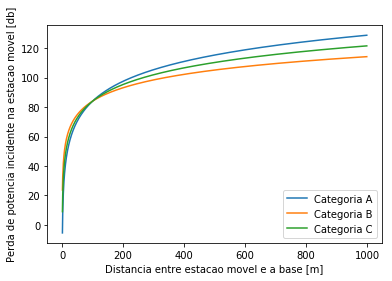

In [7]:
plt.plot(d, v1, label='Categoria A')
plt.plot(d, v2, label='Categoria B')
plt.plot(d, v3, label='Categoria C')

plt.xlabel('Distancia entre estacao movel e a base [m]')
plt.ylabel('Perda de potencia incidente na estacao movel [db]')
plt.legend()
# plt.title('Perda de Potencia em funcao da distancia entre estacao movel e base')

In [8]:
fval = np.arange(1, 300000, 1000)
fv1 = 20*np.log10(4*math.pi*d0*fval/300000000)+10*gamma[0]*np.log10(100/d0)+s
fv2 = 20*np.log10(4*math.pi*d0*fval/300000000)+10*gamma[1]*np.log10(100/d0)+s
fv3 = 20*np.log10(4*math.pi*d0*fval/300000000)+10*gamma[2]*np.log10(100/d0)+s

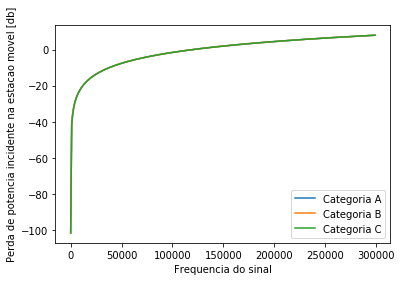

In [10]:
plt.plot(fval, fv1, label='Categoria A')
plt.plot(fval, fv2, label='Categoria B')
plt.plot(fval, fv3, label='Categoria C')

plt.xlabel('Frequencia do sinal')
plt.ylabel('Perda de potencia incidente na estacao movel [db]')
plt.legend()

http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.210.3876&rep=rep1&type=pdf
http://morse.colorado.edu/~tlen5510/text/classwebch3.html
https://www.mathworks.com/matlabcentral/fileexchange/39322-erceg-model
https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html